# **Help Mate Project Submission by Satya Prakash - C58 Batch**

# RAG Based Chatbot to search information in Life Insurance Document
## Overview
The project is to build a robust generative search system capable of effectively and accurately answering questions from a life insurance policy document.

## Goals
The project should implement all the three layers effectively. It will be key to try out various strategies and experiments in various layers in order to build an effective search system. Let's explore what you need to do in each of the layers, and the possible experimentations that you can perform based on various choices.
*   The Embedding Layer: The PDF document needs to be effectively processed, cleaned, and chunked for the embeddings. Here, the choice of the chunking strategy will have a large impact on the final quality of the retrieved results. So, make sure that you try out various stratgies and compare their performances. Another important aspect in the embedding layer is the choice of the embedding model. You can choose to embed your chunks using the OpenAI embedding model or any model from the SentenceTransformers library on HuggingFace.
*   The Search Layer: Here, you first need to design at least 3 queries against which you will test your system. You need to understand and skim through the document, and accordingly come up with some queries, the answers to which can be found in the policy document.Next, you need to embed the queries and search your ChromaDB vector database against each of these queries. Implementing a cache mechanism is also mandatory.Finally, you need to implement the re-ranking block, and for this you can choose from a range of cross-encoding models on HuggingFace.
*   The Generation Layer: In the generation layer, the final prompt that you design is the major component. Make sure that the prompt is exhaustive in its instructions, and the relevant information is correctly passed to the prompt. You may also choose to provide some few-shot examples in an attempt to improve the LLM output.

Make sure you try out different strategies and models in each layer, and you might be surprised with the variety of top answers retrieved and generated by your system.

## 1. Install and Import the Required Libraries

In [1]:
# Install all the required libraries

!pip install -U -q pdfplumber tiktoken openai sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 83.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 52.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.7 MB/s eta 0:00:00


In [2]:
!pip install chromaDB==0.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 559.5/559.5 kB 40.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 98.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# Import all the required Libraries

import pdfplumber
from pathlib import Path
import pandas as pd
from operator import itemgetter
import json
import tiktoken
import openai
import chromadb

In [4]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/Colab_Notebooks/HelpMate_AI_Project')
!ls

 ChromaDB_Data
'HelpMate Project using RAG and Chroma - Satya Prakash.ipynb'
 OPENAI_API_Key.txt
 Principal-Sample-Life-Insurance-Policy.pdf


## 2. Read, Process, and Chunk the PDF File

We will be using [pdfplumber](https://https://pypi.org/project/pdfplumber/) to read and process the PDF files.

`pdfplumber` allows for better parsing of the PDF file as it can read various elements of the PDF apart from the plain text, such as, tables, images, etc. It also offers wide functionaties and visual debugging features to help with advanced preprocessing as well.

In [6]:
# Define the path where pdf document is present

pdf_path = "/content/drive/MyDrive/Colab_Notebooks/HelpMate_AI_Project/"

In [7]:
# Function to check whether a word is present in a table or not for segregation of regular text and tables

def check_bboxes(word, table_bbox):
    # Check whether word is inside a table bbox.
    l = word['x0'], word['top'], word['x1'], word['bottom']
    r = table_bbox
    return l[0] > r[0] and l[1] > r[1] and l[2] < r[2] and l[3] < r[3]

In [8]:
# Function to extract text from a PDF file.
# 1. Declare a variable p to store the iteration of the loop that will help us store page numbers alongside the text
# 2. Declare an empty list 'full_text' to store all the text files
# 3. Use pdfplumber to open the pdf pages one by one
# 4. Find the tables and their locations in the page
# 5. Extract the text from the tables in the variable 'tables'
# 6. Extract the regular words by calling the function check_bboxes() and checking whether words are present in the table or not
# 7. Use the cluster_objects utility to cluster non-table and table words together so that they retain the same chronology as in the original PDF
# 8. Declare an empty list 'lines' to store the page text
# 9. If a text element in present in the cluster, append it to 'lines', else if a table element is present, append the table
# 10. Append the page number and all lines to full_text, and increment 'p'
# 11. When the function has iterated over all pages, return the 'full_text' list

def extract_text_from_pdf(pdf_path):
    p = 0
    full_text = []


    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            page_no = f"Page {p+1}"
            text = page.extract_text()

            tables = page.find_tables()
            table_bboxes = [i.bbox for i in tables]
            tables = [{'table': i.extract(), 'top': i.bbox[1]} for i in tables]
            non_table_words = [word for word in page.extract_words() if not any(
                [check_bboxes(word, table_bbox) for table_bbox in table_bboxes])]
            lines = []

            for cluster in pdfplumber.utils.cluster_objects(non_table_words + tables, itemgetter('top'), tolerance=5):

                if 'text' in cluster[0]:
                    try:
                        lines.append(' '.join([i['text'] for i in cluster]))
                    except KeyError:
                        pass

                elif 'table' in cluster[0]:
                    lines.append(json.dumps(cluster[0]['table']))


            full_text.append([page_no, " ".join(lines)])
            p +=1

    return full_text

*Now that we have defined the function for extracting the text and tables from a PDF, let's iterate and call this function for all the PDFs in our drive and store them in a list.*

In [9]:
# Define the directory containing the PDF files
pdf_directory = Path(pdf_path)

# Initialize an empty list to store the extracted texts and document names
data = []

# Loop through all files in the directory
for pdf_path in pdf_directory.glob("*.pdf"):

    # Process the PDF file
    print(f"...Processing {pdf_path.name}")

    # Call the function to extract the text from the PDF
    extracted_text = extract_text_from_pdf(pdf_path)

    # Convert the extracted list to a PDF, and add a column to store document names
    extracted_text_df = pd.DataFrame(extracted_text, columns=['Page No.', 'Page_Text'])
    extracted_text_df['Document Name'] = pdf_path.name

    # Append the extracted text and document name to the list
    data.append(extracted_text_df)

    # Print a message to indicate progress
    print(f"Finished processing {pdf_path.name}")

# Print a message to indicate all PDFs have been processed
print("All PDFs have been processed.")

...Processing Principal-Sample-Life-Insurance-Policy.pdf
Finished processing Principal-Sample-Life-Insurance-Policy.pdf
All PDFs have been processed.


In [10]:
# Concatenate all the DFs in the list 'data' together

insurance_pdfs_data = pd.concat(data, ignore_index=True)

In [11]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,Principal-Sample-Life-Insurance-Policy.pdf
1,Page 2,This page left blank intentionally,Principal-Sample-Life-Insurance-Policy.pdf
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,Principal-Sample-Life-Insurance-Policy.pdf
3,Page 4,This page left blank intentionally,Principal-Sample-Life-Insurance-Policy.pdf
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,Principal-Sample-Life-Insurance-Policy.pdf
...,...,...,...
59,Page 60,I f a Dependent who was insured dies during th...,Principal-Sample-Life-Insurance-Policy.pdf
60,Page 61,Section D - Claim Procedures Article 1 - Notic...,Principal-Sample-Life-Insurance-Policy.pdf
61,Page 62,A claimant may request an appeal of a claim de...,Principal-Sample-Life-Insurance-Policy.pdf
62,Page 63,This page left blank intentionally,Principal-Sample-Life-Insurance-Policy.pdf


In [12]:
# Check one of the extracted page texts to ensure that the text has been correctly read

insurance_pdfs_data.Page_Text[2]

'POLICY RIDER GROUP INSURANCE POLICY NO: S655 COVERAGE: Life EMPLOYER: RHODE ISLAND JOHN DOE Effective on the later of the Date of Issue of this Group Policy or March 1, 2005, the following will apply to your Policy: From time to time The Principal may offer or provide certain employer groups who apply for coverage with The Principal a Financial Services Hotline and Grief Support Services or any other value added service for the employees of that employer group. In addition, The Principal may arrange for third party service providers (i.e., optometrists, health clubs), to provide discounted goods and services to those employer groups who apply for coverage with The Principal or who become insureds/enrollees of The Principal. While The Principal has arranged these goods, services and/or third party provider discounts, the third party service providers are liable to the applicants/insureds/enrollees for the provision of such goods and/or services. The Principal is not responsible for the

In [13]:
# Let's also check the length of all the texts as there might be some empty pages or pages with very few words that we can drop

insurance_pdfs_data['Text_Length'] = insurance_pdfs_data['Page_Text'].apply(lambda x: len(x.split(' ')))

In [14]:
insurance_pdfs_data['Text_Length']

,Text_Length
0,30
1,5
2,230
3,5
4,110
...,...
59,285
60,418
61,322
62,5


In [15]:
# Retain only the rows with a text length of at least 10

insurance_pdfs_data = insurance_pdfs_data.loc[insurance_pdfs_data['Text_Length'] >= 10]
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,Principal-Sample-Life-Insurance-Policy.pdf,30
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,Principal-Sample-Life-Insurance-Policy.pdf,230
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,Principal-Sample-Life-Insurance-Policy.pdf,110
5,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,Principal-Sample-Life-Insurance-Policy.pdf,153
6,Page 7,Section A – Eligibility Member Life Insurance ...,Principal-Sample-Life-Insurance-Policy.pdf,176
7,Page 8,Section A - Member Life Insurance Schedule of ...,Principal-Sample-Life-Insurance-Policy.pdf,171
8,Page 9,P ART I - DEFINITIONS When used in this Group ...,Principal-Sample-Life-Insurance-Policy.pdf,387
9,Page 10,T he legally recognized union of two eligible ...,Principal-Sample-Life-Insurance-Policy.pdf,251
10,Page 11,(2) has been placed with the Member or spouse ...,Principal-Sample-Life-Insurance-Policy.pdf,299
11,Page 12,An institution that is licensed as a Hospital ...,Principal-Sample-Life-Insurance-Policy.pdf,352


In [16]:
# Store the metadata for each page in a separate column

insurance_pdfs_data['Metadata'] = insurance_pdfs_data.apply(lambda x: {'Policy_Name': x['Document Name'][:-4], 'Page_No.': x['Page No.']}, axis=1)

<ipython-input-16-4493f15e2dc4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  insurance_pdfs_data['Metadata'] = insurance_pdfs_data.apply(lambda x: {'Policy_Name': x['Document Name'][:-4], 'Page_No.': x['Page No.']}, axis=1)


In [17]:
insurance_pdfs_data

,Page No.,Page_Text,Document Name,Text_Length,Metadata
0,Page 1,DOROTHEA GLAUSE S655 RHODE ISLAND JOHN DOE 01/...,Principal-Sample-Life-Insurance-Policy.pdf,30,{'Policy_Name': 'Principal-Sample-Life-Insuran...
2,Page 3,POLICY RIDER GROUP INSURANCE POLICY NO: S655 C...,Principal-Sample-Life-Insurance-Policy.pdf,230,{'Policy_Name': 'Principal-Sample-Life-Insuran...
4,Page 5,PRINCIPAL LIFE INSURANCE COMPANY (called The P...,Principal-Sample-Life-Insurance-Policy.pdf,110,{'Policy_Name': 'Principal-Sample-Life-Insuran...
5,Page 6,TABLE OF CONTENTS PART I - DEFINITIONS PART II...,Principal-Sample-Life-Insurance-Policy.pdf,153,{'Policy_Name': 'Principal-Sample-Life-Insuran...
6,Page 7,Section A – Eligibility Member Life Insurance ...,Principal-Sample-Life-Insurance-Policy.pdf,176,{'Policy_Name': 'Principal-Sample-Life-Insuran...
7,Page 8,Section A - Member Life Insurance Schedule of ...,Principal-Sample-Life-Insurance-Policy.pdf,171,{'Policy_Name': 'Principal-Sample-Life-Insuran...
8,Page 9,P ART I - DEFINITIONS When used in this Group ...,Principal-Sample-Life-Insurance-Policy.pdf,387,{'Policy_Name': 'Principal-Sample-Life-Insuran...
9,Page 10,T he legally recognized union of two eligible ...,Principal-Sample-Life-Insurance-Policy.pdf,251,{'Policy_Name': 'Principal-Sample-Life-Insuran...
10,Page 11,(2) has been placed with the Member or spouse ...,Principal-Sample-Life-Insurance-Policy.pdf,299,{'Policy_Name': 'Principal-Sample-Life-Insuran...
11,Page 12,An institution that is licensed as a Hospital ...,Principal-Sample-Life-Insurance-Policy.pdf,352,{'Policy_Name': 'Principal-Sample-Life-Insuran...


This concludes the chunking aspect also, as we can see that mostly the pages contain few hundred words, maximum going upto 1000. So, we don't need to chunk the documents further; we can perform the embeddings on individual pages. This strategy makes sense for 2 reasons:
1. The way insurance documents are generally structured, you will not have a lot of extraneous information in a page, and all the text pieces in that page will likely be interrelated.
2. We want to have larger chunk sizes to be able to pass appropriate context to the LLM during the generation layer.

## 3. Generate and Store Embeddings using OpenAI and ChromaDB

In this section, we will embed the pages in the dataframe through OpenAI's `text-embedding-ada-002` model, and store them in a ChromaDB collection.

In [18]:
# Set the API key
filepath = "/content/drive/MyDrive/Colab_Notebooks/HelpMate_AI_Project/"

with open(filepath + "OPENAI_API_Key.txt", "r") as f:
  openai.api_key = ' '.join(f.readlines())

In [19]:
# Import the OpenAI Embedding Function into chroma

from chromadb.utils.embedding_functions import OpenAIEmbeddingFunction

In [20]:
# Define the path where chroma collections will be stored

chroma_data_path = "/content/drive/MyDrive/Colab_Notebooks/HelpMate_AI_Project/ChromaDB_Data"

In [21]:
# Call PersistentClient()

client = chromadb.PersistentClient(path=chroma_data_path)

In [22]:
# Set up the embedding function using the OpenAI embedding model

model = "text-embedding-ada-002"
embedding_function = OpenAIEmbeddingFunction(api_key=openai.api_key, model_name=model)

In [23]:
# Initialise a collection in chroma and pass the embedding_function to it so that it used OpenAI embeddings to embed the documents

insurance_collection = client.get_or_create_collection(name='RAG_on_Insurance', embedding_function=embedding_function)

In [24]:
# Convert the page text and metadata from your dataframe to lists to be able to pass it to chroma

documents_list = insurance_pdfs_data["Page_Text"].tolist()
metadata_list = insurance_pdfs_data['Metadata'].tolist()

In [25]:
# Add the documents and metadata to the collection alongwith generic integer IDs. You can also feed the metadata information as IDs by combining the policy name and page no.

insurance_collection.add(
    documents= documents_list,
    ids = [str(i) for i in range(0, len(documents_list))],
    metadatas = metadata_list
)

In [26]:
# Let's take a look at the first few entries in the collection

insurance_collection.get(
    ids = ['0','1','2'],
    include = ['embeddings', 'documents', 'metadatas']
)

{'ids': ['0', '1', '2'],
 'embeddings': [[-0.022469419986009598,
   0.01871146820485592,
   -0.02729734405875206,
   -0.031290166079998016,
   -0.0036731369327753782,
   0.027923669666051865,
   0.0008538575493730605,
   0.023656828328967094,
   -0.016571523621678352,
   0.004253792576491833,
   -0.005251998547464609,
   0.004058065824210644,
   -0.006273039150983095,
   0.023252326995134354,
   -0.011299951933324337,
   0.030977005138993263,
   0.002877181861549616,
   -0.024726800620555878,
   0.03055945597589016,
   0.007920404896140099,
   0.006413309834897518,
   0.01886804960668087,
   0.00953188817948103,
   0.012689611874520779,
   -0.012356876395642757,
   -0.009440548717975616,
   0.017889415845274925,
   -0.021686512976884842,
   0.023526344448328018,
   0.0030223457142710686,
   0.013283316045999527,
   -0.0145490150898695,
   -0.03361279144883156,
   -0.041180890053510666,
   -0.00845539104193449,
   0.013531235978007317,
   -0.0026716687716543674,
   -0.003868863452225923

In [27]:
cache_collection = client.get_or_create_collection(name='Insurance_Cache', embedding_function=embedding_function)

In [28]:
cache_collection.peek()

{'ids': ['How does the policy settlement happens?',
  'How to provide proof of good health?',
  'In what condition a member is considered as terminally ill?'],
 'embeddings': [[0.016385257244110107,
   -0.004990871995687485,
   0.01872008666396141,
   -0.028653476387262344,
   -0.04531504586338997,
   0.018043125048279762,
   -0.00801993440836668,
   0.013449450023472309,
   -0.03487047925591469,
   -0.0033554548863321543,
   0.03685992211103439,
   0.004213746637105942,
   0.006797256879508495,
   0.028114670887589455,
   0.0016794543480500579,
   0.008178813382983208,
   0.03241131082177162,
   -0.01594315841794014,
   0.01711748167872429,
   -0.017739182338118553,
   -0.008047564886510372,
   0.013421819545328617,
   -0.012655055150389671,
   0.025296295061707497,
   0.0062135495245456696,
   -0.000522400951012969,
   0.03155474364757538,
   -0.0049079786986112595,
   0.01597079075872898,
   0.029095575213432312,
   0.0034763410221785307,
   0.011729412712156773,
   -0.0191483702510

## 4. Semantic Search with Cache

In this section, we will perform a semantic search of a query in the collections embeddings to get several top semantically similar results.

In [29]:
# Read the user query

query = input()

What is needed to provide proof of good health?


In [30]:
# Searh the Cache collection first
# Query the collection against the user query and return the top 20 results

cache_results = cache_collection.query(
    query_texts=query,
    n_results=1
)

In [31]:
cache_results

{'ids': [['How to provide proof of good health?']],
 'distances': [[0.0445552016132394]],
 'metadatas': [[{'distances0': '0.33153273619528106',
    'distances1': '0.3641340622926673',
    'distances2': '0.42081834739615814',
    'distances3': '0.4342138147352416',
    'distances4': '0.43545556877867947',
    'distances5': '0.4404243800091509',
    'distances6': '0.4420652477445078',
    'distances7': '0.4501471539150335',
    'distances8': '0.45037627890524445',
    'documents0': "Insurance for which Proof of Good Health is required (see e. below) will be in force on the later of: (1) the date insurance would have been effective if Proof of Good Health had not been required; or (2) the date Proof of Good Health is approved by The Principal. c. Effective Date for Initial Noncontributory Insurance When Proof of Good Health is not Required Unless Proof of Good Health is required (see b. above and e. below), insurance for which the Member contributes no part of premium will be in force on 

In [32]:
results = insurance_collection.query(
query_texts=query,
n_results=10
)
results.items()

dict_items([('ids', [['26', '10', '14', '25', '15', '11', '47', '48', '9', '34']]), ('distances', [[0.30920068071289875, 0.3407201165335986, 0.4072698222811543, 0.4216875395127746, 0.42726480453934595, 0.43014884698845224, 0.4316070462840608, 0.43341810804927833, 0.4390804712976924, 0.4408621973408923]]), ('metadatas', [[{'Page_No.': 'Page 29', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 13', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 17', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 28', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 18', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 14', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 50', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 51', 'Policy_Name': 'Principal-Sample-Life-Insurance-Policy'}, {'Page_No.': 'Page 12

In [33]:
# Implementing Cache in Semantic Search

# Set a threshold for cache search
threshold = 0.2

ids = []
documents = []
distances = []
metadatas = []
results_df = pd.DataFrame()


# If the distance is greater than the threshold, then return the results from the main collection.

if cache_results['distances'][0] == [] or cache_results['distances'][0][0] > threshold:
      # Query the collection against the user query and return the top 10 results
      results = insurance_collection.query(
      query_texts=query,
      n_results=10
      )

      # Store the query in cache_collection as document w.r.t to ChromaDB so that it can be embedded and searched against later
      # Store retrieved text, ids, distances and metadatas in cache_collection as metadatas, so that they can be fetched easily if a query indeed matches to a query in cache
      Keys = []
      Values = []

      for key, val in results.items():
        if val is None:
          continue
        for i in range(9):
          Keys.append(str(key)+str(i))
          Values.append(str(val[0][i]))


      cache_collection.add(
          documents= [query],
          ids = [query],  # Or if you want to assign integers as IDs 0,1,2,.., then you can use "len(cache_results['documents'])" as will return the no. of queries currently in the cache and assign the next digit to the new query."
          metadatas = dict(zip(Keys, Values))
      )

      print("Not found in cache. Found in main collection.")

      result_dict = {'Metadatas': results['metadatas'][0], 'Documents': results['documents'][0], 'Distances': results['distances'][0], "IDs":results["ids"][0]}
      results_df = pd.DataFrame.from_dict(result_dict)
      results_df


# If the distance is, however, less than the threshold, you can return the results from cache

elif cache_results['distances'][0][0] <= threshold:
      cache_result_dict = cache_results['metadatas'][0][0]

      # Loop through each inner list and then through the dictionary
      for key, value in cache_result_dict.items():
          if 'ids' in key:
              ids.append(value)
          elif 'documents' in key:
              documents.append(value)
          elif 'distances' in key:
              distances.append(value)
          elif 'metadatas' in key:
              metadatas.append(value)

      print("Found in cache!")

      # Create a DataFrame
      results_df = pd.DataFrame({
        'IDs': ids,
        'Documents': documents,
        'Distances': distances,
        'Metadatas': metadatas
      })


Found in cache!


In [34]:
results_df

,IDs,Documents,Distances,Metadatas
0,26,Insurance for which Proof of Good Health is re...,0.33153273619528106,"{'Page_No.': 'Page 29', 'Policy_Name': 'Princi..."
1,10,a . A licensed Doctor of Medicine (M.D.) or Os...,0.3641340622926673,"{'Page_No.': 'Page 13', 'Policy_Name': 'Princi..."
2,14,a. be actively engaged in business for profit ...,0.42081834739615814,"{'Page_No.': 'Page 17', 'Policy_Name': 'Princi..."
3,25,Section B - Effective Dates Article 1 - Member...,0.4342138147352416,"{'Page_No.': 'Page 28', 'Policy_Name': 'Princi..."
4,15,c . a copy of the form which contains the stat...,0.43545556877867947,"{'Page_No.': 'Page 18', 'Policy_Name': 'Princi..."
5,48,Coverage During Disability will cease on the e...,0.4404243800091509,"{'Page_No.': 'Page 51', 'Policy_Name': 'Princi..."
6,47,The Principal may require that a ADL Disabled ...,0.4420652477445078,"{'Page_No.': 'Page 50', 'Policy_Name': 'Princi..."
7,59,A claimant may request an appeal of a claim de...,0.4501471539150335,"{'Page_No.': 'Page 62', 'Policy_Name': 'Princi..."
8,28,Scheduled Benefit in force for the Member befo...,0.45037627890524445,"{'Page_No.': 'Page 31', 'Policy_Name': 'Princi..."


## 5. Re-Ranking with a Cross Encoder

Re-ranking the results obtained from your semantic search can sometime significantly improve the relevance of the retrieved results. This is often done by passing the query paired with each of the retrieved responses into a cross-encoder to score the relevance of the response w.r.t. the query.

<br>

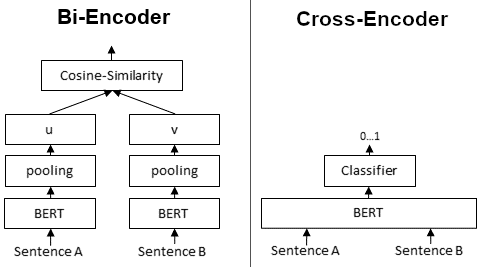

<br>

In [35]:
# Import the CrossEncoder library from sentence_transformers

from sentence_transformers import CrossEncoder, util

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [36]:
# Initialise the cross encoder model

cross_encoder = CrossEncoder('cross-encoder/ms-marco-MiniLM-L-6-v2')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [37]:
# Input (query, response) pairs for each of the top 20 responses received from the semantic search to the cross encoder
# Generate the cross_encoder scores for these pairs

cross_inputs = [[query, response] for response in results_df['Documents']]
cross_rerank_scores = cross_encoder.predict(cross_inputs)

In [38]:
cross_rerank_scores

array([  4.140118 ,  -4.5604186,  -2.800095 ,  -8.64089  , -10.540484 ,
        -7.961804 ,  -6.8993087, -10.33175  ,  -2.361054 ], dtype=float32)

In [39]:
# Store the rerank_scores in results_df

results_df['Reranked_scores'] = cross_rerank_scores

In [40]:
results_df

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,26,Insurance for which Proof of Good Health is re...,0.33153273619528106,"{'Page_No.': 'Page 29', 'Policy_Name': 'Princi...",4.140118
1,10,a . A licensed Doctor of Medicine (M.D.) or Os...,0.3641340622926673,"{'Page_No.': 'Page 13', 'Policy_Name': 'Princi...",-4.560419
2,14,a. be actively engaged in business for profit ...,0.42081834739615814,"{'Page_No.': 'Page 17', 'Policy_Name': 'Princi...",-2.800095
3,25,Section B - Effective Dates Article 1 - Member...,0.4342138147352416,"{'Page_No.': 'Page 28', 'Policy_Name': 'Princi...",-8.640890
4,15,c . a copy of the form which contains the stat...,0.43545556877867947,"{'Page_No.': 'Page 18', 'Policy_Name': 'Princi...",-10.540484
5,48,Coverage During Disability will cease on the e...,0.4404243800091509,"{'Page_No.': 'Page 51', 'Policy_Name': 'Princi...",-7.961804
6,47,The Principal may require that a ADL Disabled ...,0.4420652477445078,"{'Page_No.': 'Page 50', 'Policy_Name': 'Princi...",-6.899309
7,59,A claimant may request an appeal of a claim de...,0.4501471539150335,"{'Page_No.': 'Page 62', 'Policy_Name': 'Princi...",-10.331750
8,28,Scheduled Benefit in force for the Member befo...,0.45037627890524445,"{'Page_No.': 'Page 31', 'Policy_Name': 'Princi...",-2.361054


In [41]:
# Return the top 3 results from semantic search

top_3_semantic = results_df.sort_values(by='Distances')
top_3_semantic[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,26,Insurance for which Proof of Good Health is re...,0.33153273619528106,"{'Page_No.': 'Page 29', 'Policy_Name': 'Princi...",4.140118
1,10,a . A licensed Doctor of Medicine (M.D.) or Os...,0.3641340622926673,"{'Page_No.': 'Page 13', 'Policy_Name': 'Princi...",-4.560419
2,14,a. be actively engaged in business for profit ...,0.42081834739615814,"{'Page_No.': 'Page 17', 'Policy_Name': 'Princi...",-2.800095


In [42]:
# Return the top 3 results after reranking

top_3_rerank = results_df.sort_values(by='Reranked_scores', ascending=False)
top_3_rerank[:3]

,IDs,Documents,Distances,Metadatas,Reranked_scores
0,26,Insurance for which Proof of Good Health is re...,0.33153273619528106,"{'Page_No.': 'Page 29', 'Policy_Name': 'Princi...",4.140118
8,28,Scheduled Benefit in force for the Member befo...,0.45037627890524445,"{'Page_No.': 'Page 31', 'Policy_Name': 'Princi...",-2.361054
2,14,a. be actively engaged in business for profit ...,0.42081834739615814,"{'Page_No.': 'Page 17', 'Policy_Name': 'Princi...",-2.800095


In [43]:
top_3_RAG = top_3_rerank[["Documents", "Metadatas"]][:3]

In [44]:
top_3_RAG

,Documents,Metadatas
0,Insurance for which Proof of Good Health is re...,"{'Page_No.': 'Page 29', 'Policy_Name': 'Princi..."
8,Scheduled Benefit in force for the Member befo...,"{'Page_No.': 'Page 31', 'Policy_Name': 'Princi..."
2,a. be actively engaged in business for profit ...,"{'Page_No.': 'Page 17', 'Policy_Name': 'Princi..."


## 6. Retrieval Augmented Generation

Now that we have the final top search results, we can pass it to an GPT 3.5 along with the user query and a well-engineered prompt, to generate a direct answer to the query along with citations, rather than returning whole pages/chunks.

In [45]:
# Define the function to generate the response. Provide a comprehensive prompt that passes the user query and the top 3 results to the model

def generate_response(query, results_df):
    """
    Generate a response using GPT-3.5's ChatCompletion based on the user query and retrieved information.
    """
    messages = [
                {"role": "system", "content":  "You are a helpful assistant in the insurance domain who can effectively answer user queries about life insurance policies and documents."},
                {"role": "user", "content": f"""You are a helpful assistant in the insurance domain who can effectively answer user queries about life insurance policies and documents.
                                                You have a question asked by the user in '{query}' and you have some search results from a corpus of insurance documents in the dataframe '{top_3_RAG}'. These search results are essentially one page of an life insurance document that may be relevant to the user query.

                                                The column 'documents' inside this dataframe contains the actual text from the policy document and the column 'metadata' contains the policy name and source page. The text inside the document may also contain tables in the format of a list of lists where each of the nested lists indicates a row.

                                                Use the documents in '{top_3_RAG}' to answer the query '{query}'. Frame an informative answer and also, use the dataframe to return the relevant policy names and page numbers as citations.

                                                Follow the guidelines below when performing the task.
                                                1. Try to provide relevant/accurate numbers if available.
                                                2. You don’t have to necessarily use all the information in the dataframe. Only choose information that is relevant.
                                                3. If the document text has tables with relevant information, please reformat the table and return the final information in a tabular in format.
                                                3. Use the Metadatas columns in the dataframe to retrieve and cite the policy name(s) and page numbers(s) as citation.
                                                4. If you can't provide the complete answer, please also provide any information that will help the user to search specific sections in the relevant cited documents.
                                                5. You are a customer facing assistant, so do not provide any information on internal workings, just answer the query directly.

                                                The generated response should answer the query directly addressing the user and avoiding additional information. If you think that the query is not relevant to the document, reply that the query is irrelevant. Provide the final response as a well-formatted and easily readable text along with the citation. Provide your complete response first with all information, and then provide the citations.
                                                """},
              ]

    response = openai.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=messages
    )

    return response.choices[0].message.content.split('\n')

In [46]:
# Generate the response

response = generate_response(query, top_3_RAG)

In [47]:
# Print the response

print("\n".join(response))

To provide proof of good health for your life insurance policy, you may need to fulfill certain requirements as specified in the policy document. These requirements can vary based on the insurance provider and policy type. 

Below are the relevant details extracted from the insurance documents that can shed light on what may be needed to provide proof of good health:

| Requirement                                               | Details                                                                     |
|-----------------------------------------------------------|-----------------------------------------------------------------------------|
| Proof of Good Health                                      | - Insurance for which Proof of Good Health is required.                    |
|                                                           | - Scheduled Benefit in force for the Member before Minumum Calendar Year.   |
|                                                           | - Engage

In [48]:
# Print the LLM respone
import textwrap

# Set the desired width for wrapping
wrap_width = 150

# Wrap each line of the response and then join the wrapped lines
wrapped_response = [textwrap.fill(line, width=wrap_width) for line in response]
print("\n".join(wrapped_response))

To provide proof of good health for your life insurance policy, you may need to fulfill certain requirements as specified in the policy document.
These requirements can vary based on the insurance provider and policy type.

Below are the relevant details extracted from the insurance documents that can shed light on what may be needed to provide proof of good health:

| Requirement                                               | Details                                                                     |
|-----------------------------------------------------------|-----------------------------------------------------------------------------|
| Proof of Good Health                                      | - Insurance for which Proof of Good Health is required.                    |
|                                                           | - Scheduled Benefit in force for the Member before Minumum Calendar Year.   |
|                                                           | - Engaged